In [4]:
import pandas as pd

# Load the Iris dataset
file_path ="IRIS.csv"  # Update this with your file's path
df= pd.read_csv(file_path)

# Display the first few rows
print(df.head(10))


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [5]:
#importing LabelEncoder from sklearn library
from sklearn.preprocessing import LabelEncoder

# Separate features as X and target variable as y
X = df.drop('species', axis=1)
y = df['species']


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [6]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [7]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
from sklearn.tree import DecisionTreeClassifier

# Initializing the classifier
classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
from sklearn.metrics import accuracy_score, classification_report

# predicting tested data
y_pred = classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generating classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification_Report is:")
print(report)


Accuracy: 93.33%
Classification_Report is:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



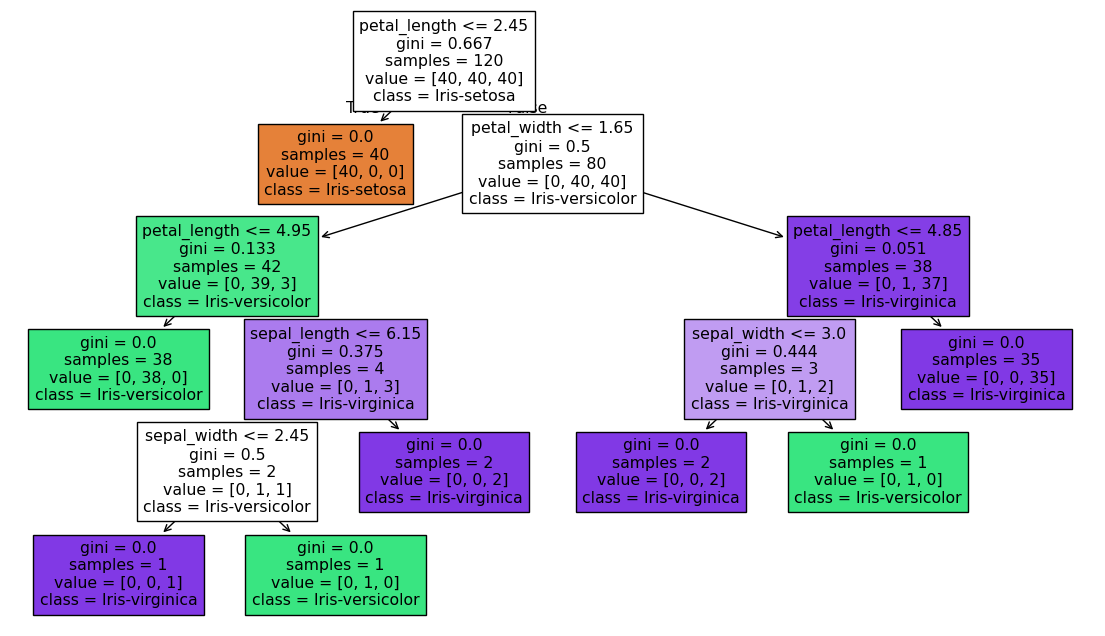

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plot_tree(classifier, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.show()


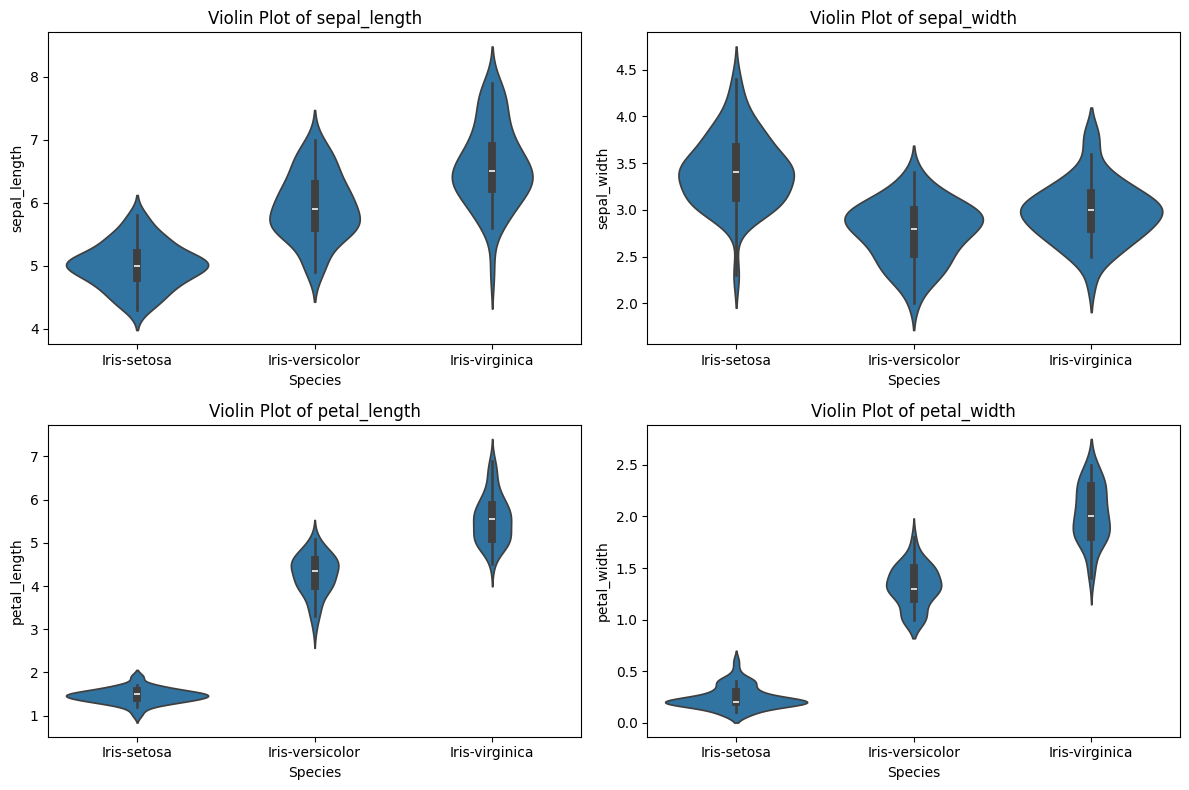

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is a pandas DataFrame containing the dataset
features = df.columns[:-1]  # Exclude the 'species' column

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):  # Loop through the features
    plt.subplot(2, 2, i)  # Create a 2x2 grid for subplots
    sns.violinplot(x='species', y=feature, data=iris_data)  # Violin plot by species for each feature
    plt.title(f'Violin Plot of {feature}')
    plt.xlabel('Species')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()
